In [6]:
import numpy as np
from tenpy.networks.mps import MPS
from tenpy.models.hubbard import FermiHubbardModel
from tenpy.algorithms import dmrg
import matplotlib.pyplot as plt

In [20]:
def run_dmrg_OBC(L, U, t, mu, chi_max, sweeps):
    model_params = {
        'L': L,
        'U': U,
        't': t,
        'mu': mu,
        'bc_MPS': 'finite',
    }

    model = FermiHubbardModel(model_params)
    # Example change: initializing with an alternating pattern of filled and empty sites
    initial_state = ['up', 'down'] * (L // 2) if L % 2 == 0 else ['up', 'down'] * (L // 2) + ['up']
    psi = MPS.from_product_state(model.lat.mps_sites(), initial_state, bc='finite')

    dmrg_params = {
        'mixer': True,
        'trunc_params': {
            'chi_max': chi_max,
            'svd_min': 1.e-10
        },
        'max_sweeps': sweeps,
    }

    eng = dmrg.TwoSiteDMRGEngine(psi, model, dmrg_params)
    E0, psi = eng.run()
    return E0, psi

def run_dmrg_PBC(L, U, t, mu, chi_max, sweeps, hc_flag=False):
    model_params = {
        'L': L,
        'U': U,
        't':t,
        'mu': mu,
        'bc_MPS': 'finite',
        'bc_x':'periodic',
        'explicit_plus_hc':hc_flag
    }

    model = FermiHubbardModel(model_params)

    # Initialize the MPS for half-filling with an alternating pattern of up and down spins
    initial_state = ['up', 'down'] * (L // 2) if L % 2 == 0 else ['up', 'down'] * (L // 2) + ['up']
    psi = MPS.from_product_state(model.lat.mps_sites(), initial_state, bc='finite')

    dmrg_params = {
        'mixer': True,  # Enables mixing for better convergence in difficult phases
        'trunc_params': {
            'chi_max': chi_max,
            'svd_min': 1.e-10
        },
        'max_sweeps': sweeps,
    }

    eng = dmrg.TwoSiteDMRGEngine(psi, model, dmrg_params)
    E0, psi = eng.run()

    return E0, psi


In [28]:
U = 4.0  # on-site interaction strength
t = 1.0  # hopping term
mu = 2.0  # chemical potential
chi_max = 200  # max bond dimension
sweeps = 100  # number of DMRG sweeps

L_list = np.array([4, 6, 8, 10])
overlap_vals = np.zeros_like(L_list).astype(float)

for i, L in enumerate(L_list):
    _, psi_OBC = run_dmrg_OBC(L, U, t, mu, chi_max, sweeps)
    _, psi_PBC = run_dmrg_PBC(L, U, t, mu, chi_max, sweeps)
    overlap_vals[i] = psi_OBC.overlap(psi_PBC)
    print(L)

4
6
8
10


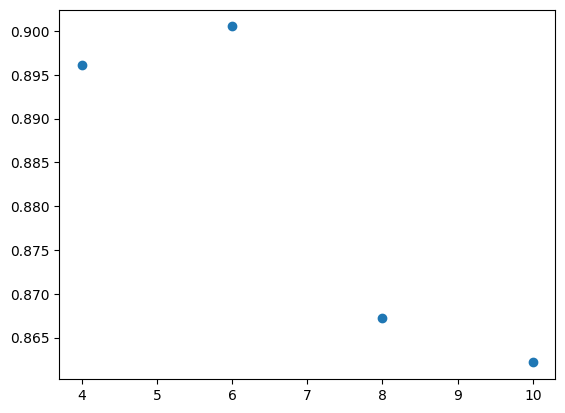

In [29]:
plt.scatter(L_list, np.abs(overlap_vals))

In [21]:
U = 4.0  # on-site interaction strength
t = 1.0  # hopping term
mu = 2.0  # chemical potential
chi_max = 200  # max bond dimension
sweeps = 50  # number of DMRG sweeps
L = 5

_, psi_OBC = run_dmrg_OBC(L, U, t, mu, chi_max, sweeps)
_, psi_PBC = run_dmrg_PBC(L, U, t, mu, chi_max, sweeps)

In [22]:
psi_OBC.overlap(psi_PBC)

-0.9046886142549343